<div style="font-size:300%;color:white; background-color: #26A991;">.</div>
<div style="font-size:300%;color:white; background-color: #26A991;">Tratamiento de datos Pre cálculo Huella Hídrica Azul</div>
<div style="font-size:300%;color:white; background-color: #26A991;">.</div>
<div style="font-size:150%;color:white; background-color: #26A991;">Visualización-Estimación-Tratamiento de Valores 
Atípicos</div>

### *Librerías*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')
#Librerias basicas para proyecciones
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pmdarima import auto_arima
import os
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
import warnings
warnings.filterwarnings('ignore')
import arch
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline
plt.style.use("seaborn-bright")

### *Cargamos los datos*

In [2]:
datos = pd.read_excel('datos_apriori_python.xlsx')

Definimos el índice

In [3]:
index = pd.Index(sm.tsa.datetools.dates_from_range("2016M1", "2022M12"))    
datos.set_index(index, inplace=True)

Revisamos la información general de los datos

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2016-01-31 to 2022-12-31
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Mes                                       84 non-null     datetime64[ns]
 1   Consumo agua(m3)                          84 non-null     int64         
 2    Consumo Energía    (kWh)                 84 non-null     float64       
 3   Consumo de papel (resmas/mes)             73 non-null     float64       
 4   Litros totales       (l) Fuentes Fijas    47 non-null     float64       
 5   Litros totales       (l) Fuentes Móviles  84 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.6 KB


<Axes: >

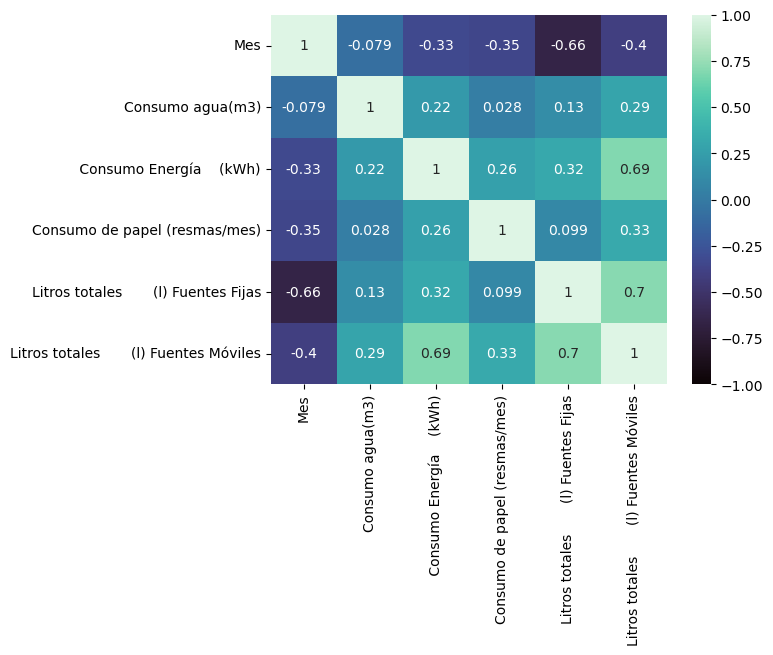

In [5]:
sns.heatmap(datos.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'mako')

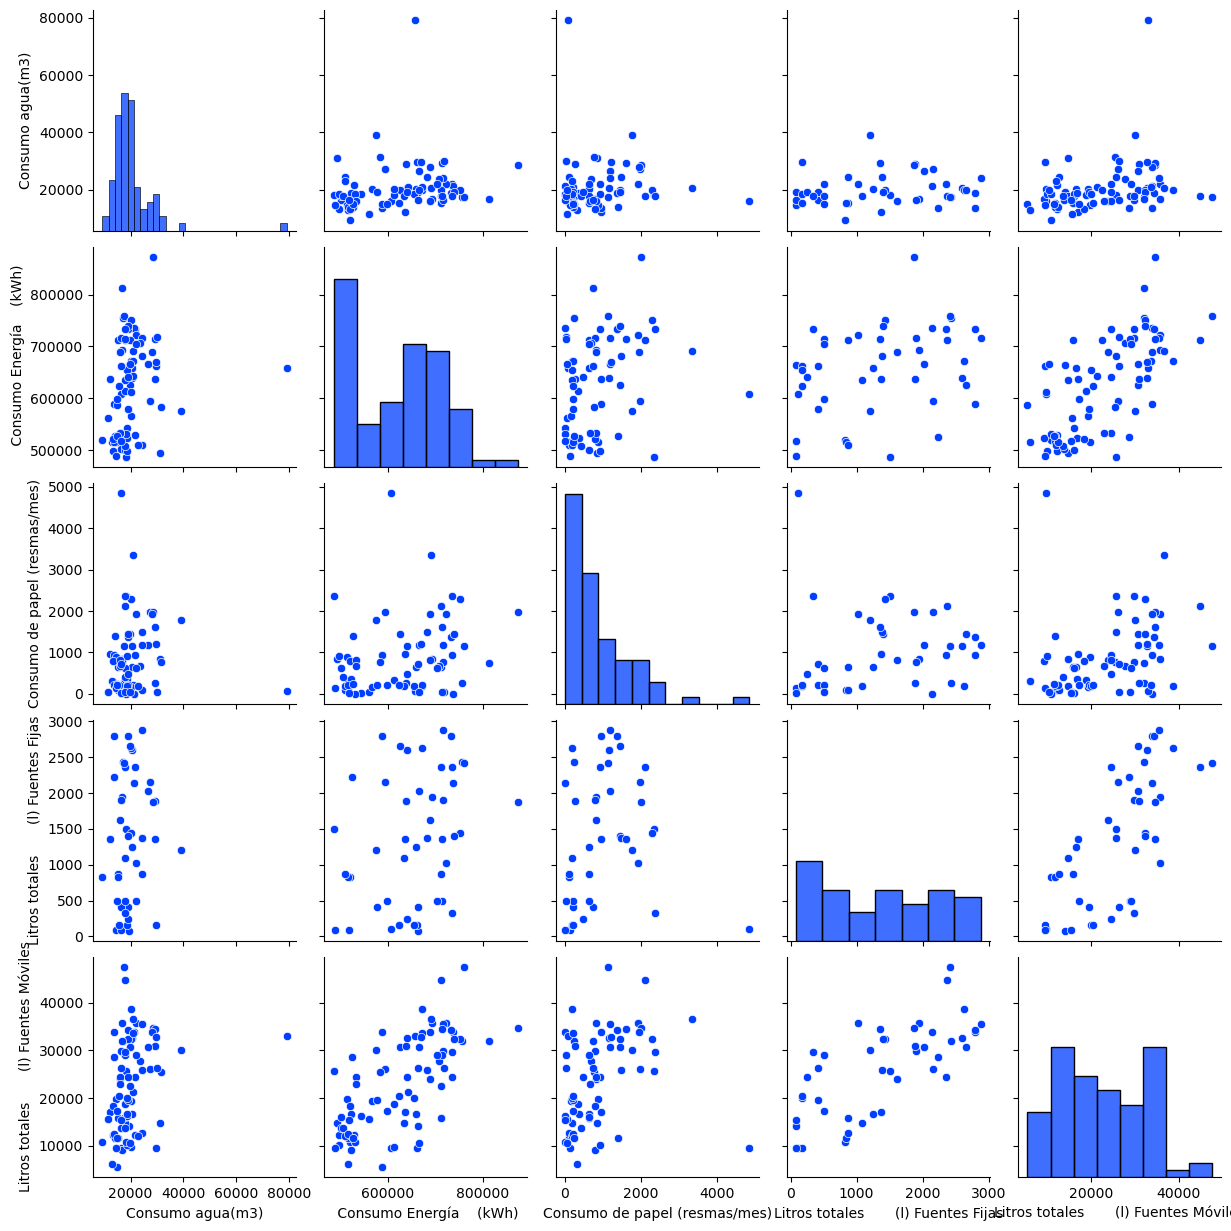

In [6]:
sns.pairplot(data = datos)
plt.show()

Revisamos cuales son las columnas que poseen valores no numericos

In [7]:
datos.isna().sum()

Mes                                          0
Consumo agua(m3)                             0
 Consumo Energía    (kWh)                    0
Consumo de papel (resmas/mes)               11
Litros totales       (l) Fuentes Fijas      37
Litros totales       (l) Fuentes Móviles     0
dtype: int64

Creamos un nuevo objeto que me contenga las variables que poseen valores no numericos o perdidos

In [8]:
Series_con_valores_nan = datos[["Consumo de papel (resmas/mes)", "Litros totales       (l) Fuentes Fijas"]]

## *Consumo de Agua m3*

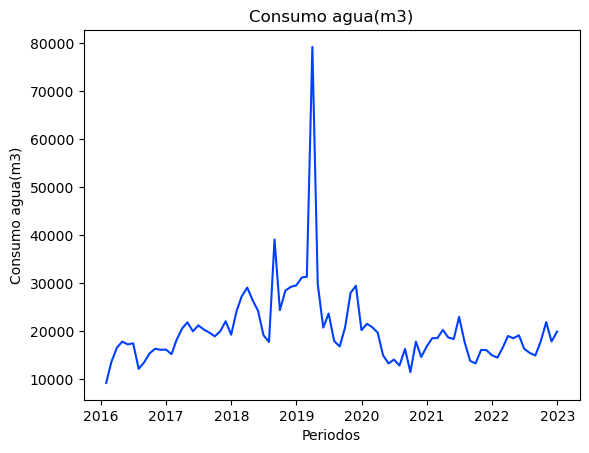

In [9]:
plt.plot(datos["Consumo agua(m3)"])
plt.title("Consumo agua(m3)")
plt.xlabel("Periodos")   
plt.ylabel("Consumo agua(m3)")
plt.show()    

Grafico Interactivo

In [10]:
fig = px.line(datos, x= datos.index, y="Consumo agua(m3)", title='Consumo agua(m3)')
fig.show()

## *Consumo de Energía*

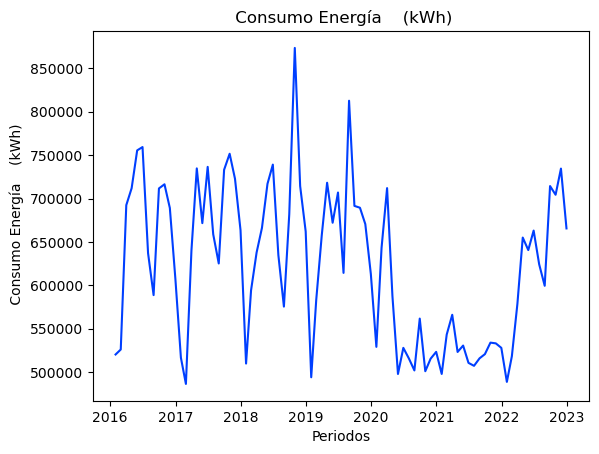

In [11]:
plt.plot(datos[" Consumo Energía    (kWh)"])
plt.title(" Consumo Energía    (kWh)")
plt.xlabel("Periodos") 
plt.ylabel(" Consumo Energía    (kWh)")
plt.show() 

In [12]:
fig = px.line(datos, x= datos.index, y=" Consumo Energía    (kWh)", title=' Consumo Energía    (kWh) Original')
fig.show()

## *Consumo de Papel*

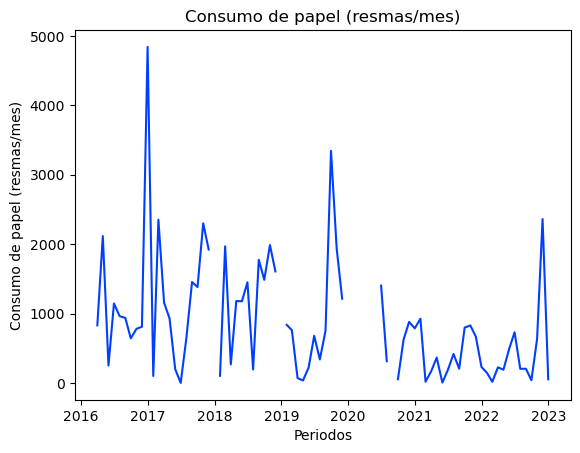

In [13]:
plt.plot(Series_con_valores_nan["Consumo de papel (resmas/mes)"])
plt.title("Consumo de papel (resmas/mes)") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show() 

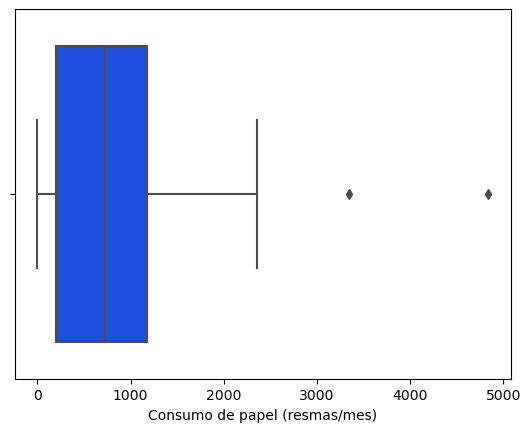

In [14]:
sns.boxplot(data = datos, x = "Consumo de papel (resmas/mes)")
plt.show()

In [15]:
datos["Consumo de papel (resmas/mes)"].isna().sum()

11

### *Método Interpolado Linear*

La interpolación lineal es la técnica de determinar los valores de las funciones de cualquier punto intermedio cuando se conocen los valores de dos puntos adyacentes. La interpolación lineal es básicamente la estimación de un valor desconocido que se encuentra dentro de dos valores conocidos. La interpolación lineal se utiliza en diversas disciplinas como estadística, economía, determinación de precios, etc. Se utiliza para llenar los vacíos en los datos estadísticos en aras de la continuidad de la información.

## *$f(x)=y=y_1 +(x-x_1)\beta_1$*

## $ \beta1 = (y_2 - y_1 / x_2 -x_1 ) $ 

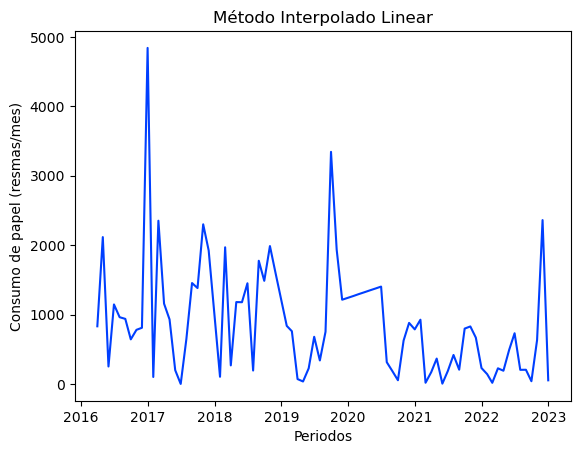

In [16]:
plt.plot(Series_con_valores_nan["Consumo de papel (resmas/mes)"].interpolate())
plt.title("Método Interpolado Linear") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show() 

In [17]:
fig = px.line(datos, x= Series_con_valores_nan.index,
              y= Series_con_valores_nan["Consumo de papel (resmas/mes)"].interpolate(),
              title='Método Interpolado Linear')
fig.show()

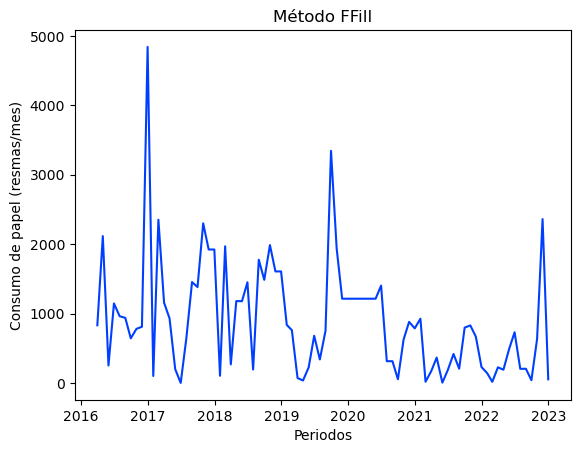

In [18]:
plt.plot(Series_con_valores_nan["Consumo de papel (resmas/mes)"].ffill())
plt.title("Método FFill") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show() 

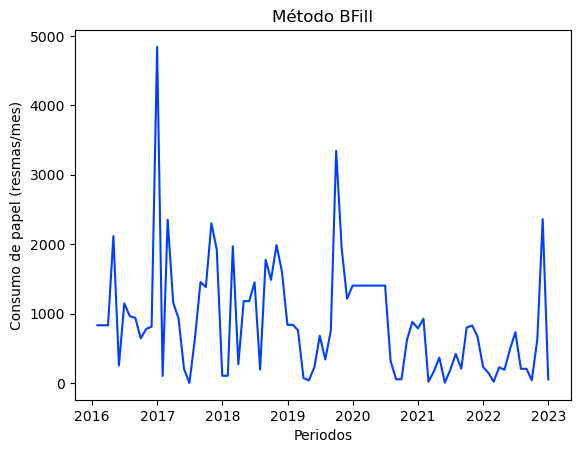

In [19]:
plt.plot(Series_con_valores_nan["Consumo de papel (resmas/mes)"].bfill())
plt.title("Método BFill") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show() 

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
data_iterative_imp_papel = pd.DataFrame()
data_iterative_imp_papel["x_1"] = datos["Litros totales       (l) Fuentes Móviles"]
data_iterative_imp_papel["x_2"] = datos["Consumo agua(m3)"]
data_iterative_imp_papel["y"] = datos['Consumo de papel (resmas/mes)']

In [25]:
imp_int_papel = IterativeImputer(random_state=0)
y_hat_papel = imp_int_papel.fit_transform(data_iterative_imp_papel)

In [26]:
y_hat_papel= pd.DataFrame(y_hat_papel)

In [27]:
index = pd.Index(sm.tsa.datetools.dates_from_range("2016M1", "2022M12"))    
y_hat_papel.set_index(index, inplace=True)

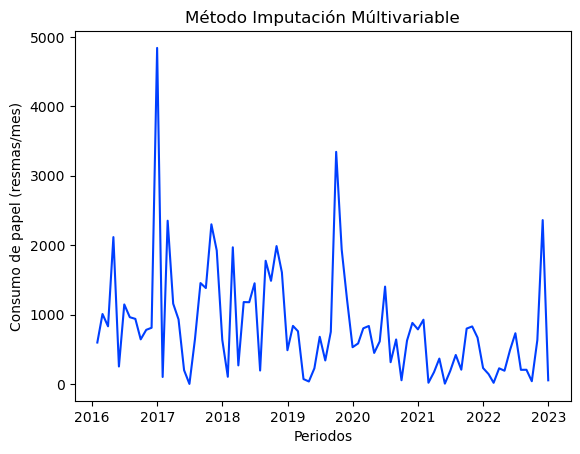

In [28]:
plt.plot(y_hat_papel[2])
plt.title("Método Imputación Múltivariable") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show() 

## *Consumo de Combustible Móviles*

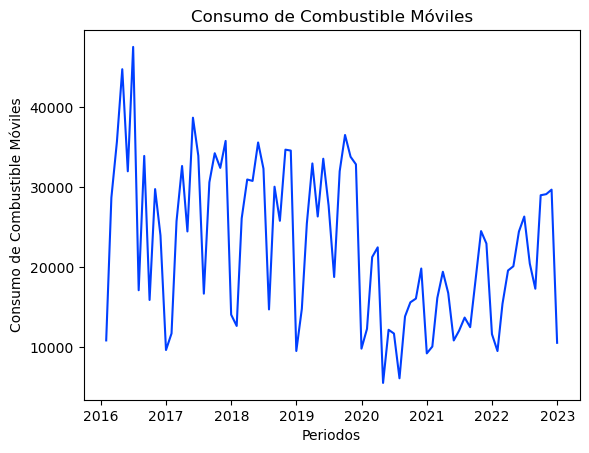

In [29]:
plt.plot(datos["Litros totales       (l) Fuentes Móviles"])
plt.title("Consumo de Combustible Móviles") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de Combustible Móviles")
plt.show()

In [30]:
fig = px.line(datos, x= datos.index,
              y= datos["Litros totales       (l) Fuentes Móviles"],
              title='Consumo de Combustible Móviles')
fig.show()

## *Consumo de Combustible Fijo*

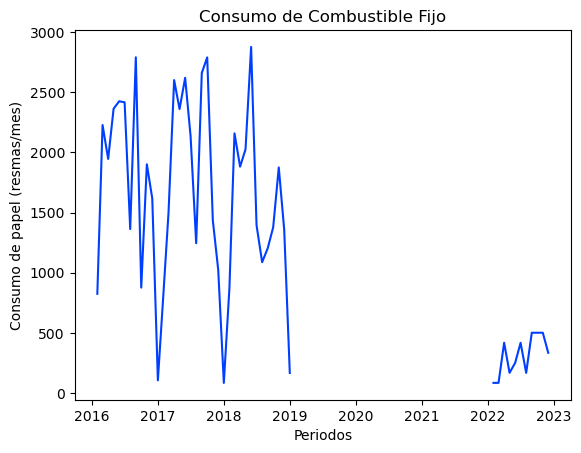

In [31]:
plt.plot(Series_con_valores_nan["Litros totales       (l) Fuentes Fijas"])
plt.title("Consumo de Combustible Fijo") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show() 

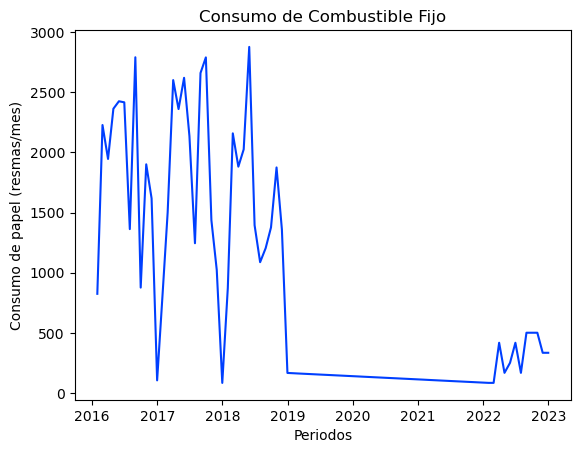

In [32]:
plt.plot(Series_con_valores_nan["Litros totales       (l) Fuentes Fijas"].interpolate())
plt.title("Consumo de Combustible Fijo") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show() 

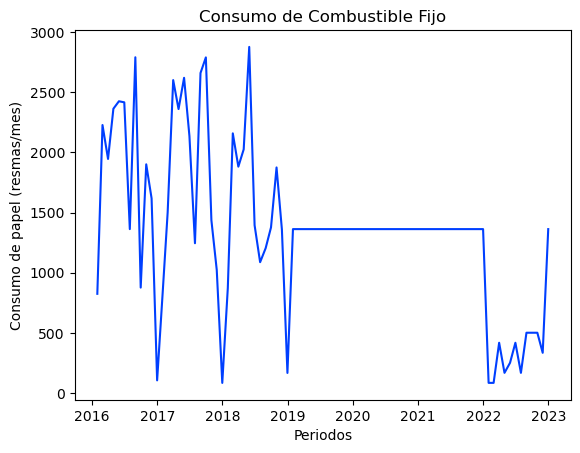

In [33]:
median = Series_con_valores_nan["Litros totales       (l) Fuentes Fijas"].median()
plt.plot(Series_con_valores_nan["Litros totales       (l) Fuentes Fijas"].fillna(median))
plt.title("Consumo de Combustible Fijo") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show() 

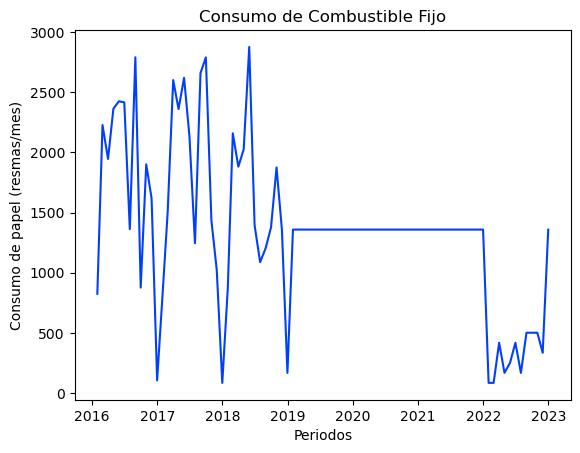

In [34]:
mean = Series_con_valores_nan["Litros totales       (l) Fuentes Fijas"].mean()
plt.plot(Series_con_valores_nan["Litros totales       (l) Fuentes Fijas"].fillna(mean))
plt.title("Consumo de Combustible Fijo") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show()

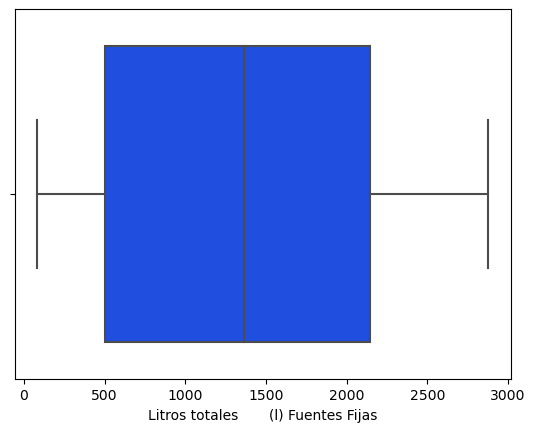

In [35]:
sns.boxplot(data = datos, x = "Litros totales       (l) Fuentes Fijas")
plt.show()

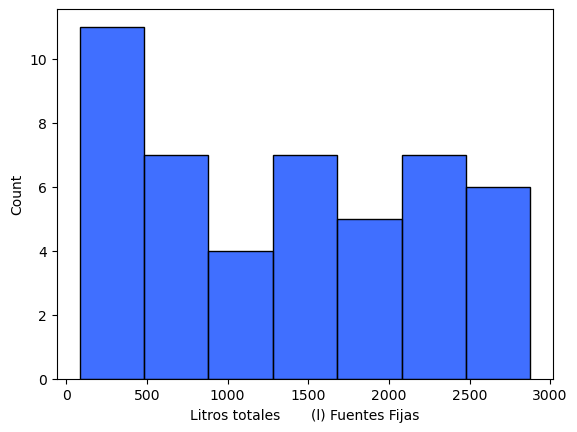

In [36]:
sns.histplot(data = datos, x = "Litros totales       (l) Fuentes Fijas" )
plt.show()

In [37]:
print(mean)
print("___________")
print(median)

1358.5759402476463
___________
1362.4482672475524


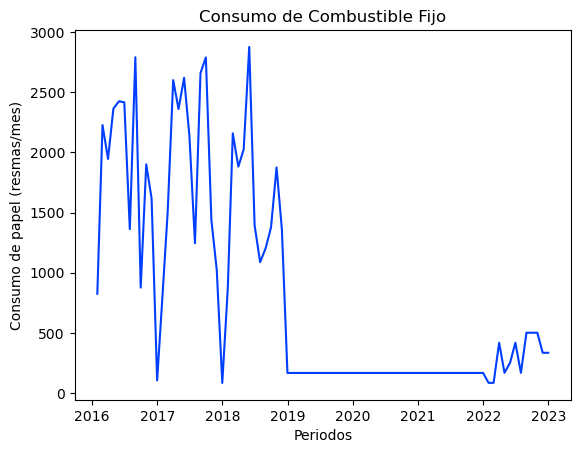

In [38]:
plt.plot(Series_con_valores_nan["Litros totales       (l) Fuentes Fijas"].ffill())
plt.title("Consumo de Combustible Fijo") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show()

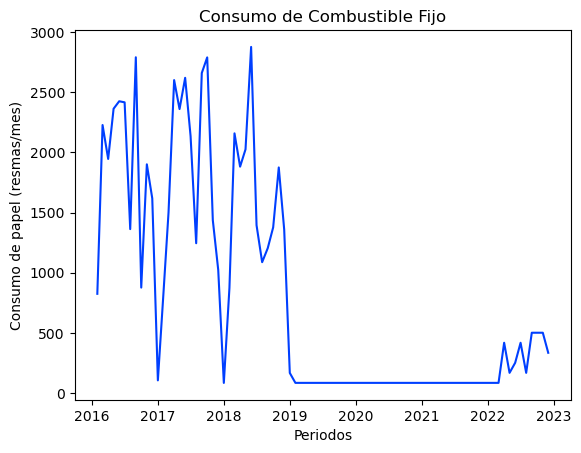

In [39]:
plt.plot(Series_con_valores_nan["Litros totales       (l) Fuentes Fijas"].bfill())
plt.title("Consumo de Combustible Fijo") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show()

# Tramiento de Datos para no desestimar la variable Combustible Fijo

### *Holt Winters*

In [40]:
modelo_holt_winters = ExponentialSmoothing(datos['Litros totales       (l) Fuentes Fijas'].loc["2016-01-31":"2018-12-31"],
                                           seasonal_periods = 12, trend='mul', seasonal='mul').fit(optimized = True)

In [41]:
modelo_holt_winters.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ExponentialSmoothing Model Results                                
==================================================================================================
Dep. Variable:     Litros totales       (l) Fuentes Fijas   No. Observations:                   36
Model:                               ExponentialSmoothing   SSE                        6056611.073
Optimized:                                           True   AIC                            465.193
Trend:                                     Multiplicative   BIC                            490.529
Seasonal:                                  Multiplicative   AICC                           505.428
Seasonal Periods:                                      12   Date:                 Tue, 17 Oct 2023
Box-Cox:                                            False   Time:                         08:59:15
Box-Cox Coeff.:                                      None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1464286                alpha                 True
smoothing_trend               0.1464285                 beta                 True
smoothing_seasonal            0.0001000                gamma                 True
initial_level                 1693.2850                  l.0                 True
initial_trend                 1.0180889                  b.0                 True
initial_seasons.0             0.5821284                  s.0                 True
initial_seasons.1             1.3195883                  s.1                 True
initial_seasons.2             1.3470680                  s.2                 True
initial_seasons.3             1.4352417                  s.3                 True
initial_seasons.4             1.6864904                  s.4                 True
initial_seasons.5             1.3070205                  s.5                 True
initial_seasons.6             0.7762930                  s.6                 True
initial_seasons.7             1.5393276                  s.7                 True
initial_seasons.8             1.0819651                  s.8                 True
initial_seasons.9             1.0491677                  s.9                 True
initial_seasons.10            0.7812707                 s.10                 True
initial_seasons.11            0.2207569                 s.11                 True
---------------------------------------------------------------------------------
"""

## *Estimadores* : $\alpha = 0.1464286$   $\beta = 0.1464285$    $\gamma = 0.0001000$

In [42]:
forecast_holtwinters = modelo_holt_winters.forecast(36)

In [43]:
forecast_holtwinters = pd.DataFrame(forecast_holtwinters)

In [44]:
forecast_holtwinters

0
2019-01-31   734.809767
2019-02-28  1645.622675
2019-03-31  1659.680224
2019-04-30  1746.977211
2019-05-31  2028.048810
2019-06-30  1552.750292
2019-07-31   911.136907
2019-08-31  1784.865343
2019-09-30  1239.468834
2019-10-31  1187.431012
2019-11-30   873.568095
2019-12-31   243.815052
2020-01-31   635.261556
2020-02-29  1422.682262
2020-03-31  1434.835367
2020-04-30  1510.305811
2020-05-31  1753.299290
2020-06-30  1342.391747
2020-07-31   787.700811
2020-08-31  1543.061056
2020-09-30  1071.552034
2020-10-31  1026.564025
2020-11-30   755.221627
2020-12-31   210.784255
2021-01-31   549.199620
2021-02-28  1229.944658
2021-03-31  1240.451324
2021-04-30  1305.697424
2021-05-31  1515.771409
2021-06-30  1160.531485
2021-07-31   680.987196
2021-08-31  1334.015159
2021-09-30   926.383730
2021-10-31   887.490463
2021-11-30   652.908123
2021-12-31   182.228299

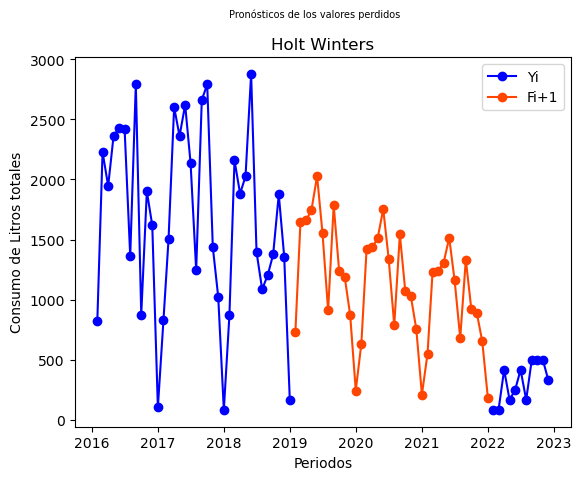

In [45]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('Pronósticos de los valores perdidos', fontsize =7)

ax1.plot(datos.index,
         datos['Litros totales       (l) Fuentes Fijas'],
         '-o',  color = 'blue', label = 'Yi')
ax1.plot(forecast_holtwinters,'-o',  color = 'orangered', label = 'Fi+1' )
ax1.set(xlabel= 'Periodos', ylabel= 'Consumo de Litros totales')
ax1.set_title('Holt Winters')
ax1.legend(loc='best')

plt.show()

In [46]:
datos_reales_estimados_litros_totales_holtwinters =  pd.concat([datos['Litros totales       (l) Fuentes Fijas'].loc["2016-01-31":"2018-12-31"],
                                                  forecast_holtwinters,datos['Litros totales       (l) Fuentes Fijas'].loc["2022-01-01":"2022-12-31"]])

In [47]:
datos_reales_estimados_litros_totales_holtwinters.columns  = ["H-W"]

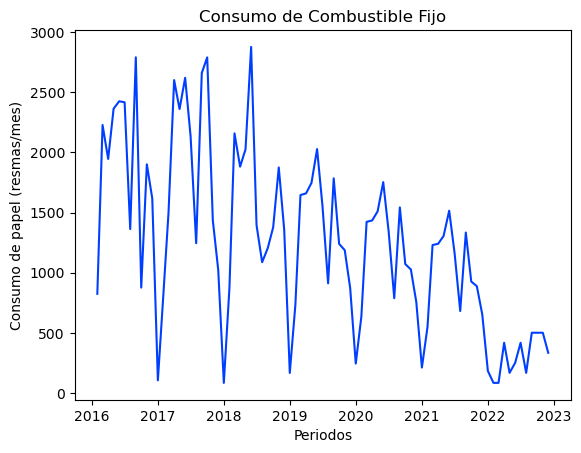

In [48]:
plt.plot(datos_reales_estimados_litros_totales_holtwinters)
plt.title("Consumo de Combustible Fijo") 
plt.xlabel("Periodos")   
plt.ylabel("Consumo de papel (resmas/mes)")
plt.show()

In [49]:
fig = px.line(datos_reales_estimados_litros_totales_holtwinters, x= datos_reales_estimados_litros_totales_holtwinters.index,
              y= datos_reales_estimados_litros_totales_holtwinters["H-W"] ,
              title='Método Estimación de Valores Perdidos Holt Winters')
fig.show()

### *SARMA*

In [50]:
arimadataset = pd.DataFrame()
arimadataset = datos['Litros totales       (l) Fuentes Fijas'].loc["2016-01-31":"2018-12-31"]
arimadataset.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 36 entries, 2016-01-31 to 2018-12-31
Series name: Litros totales       (l) Fuentes Fijas
Non-Null Count  Dtype  
--------------  -----  
36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


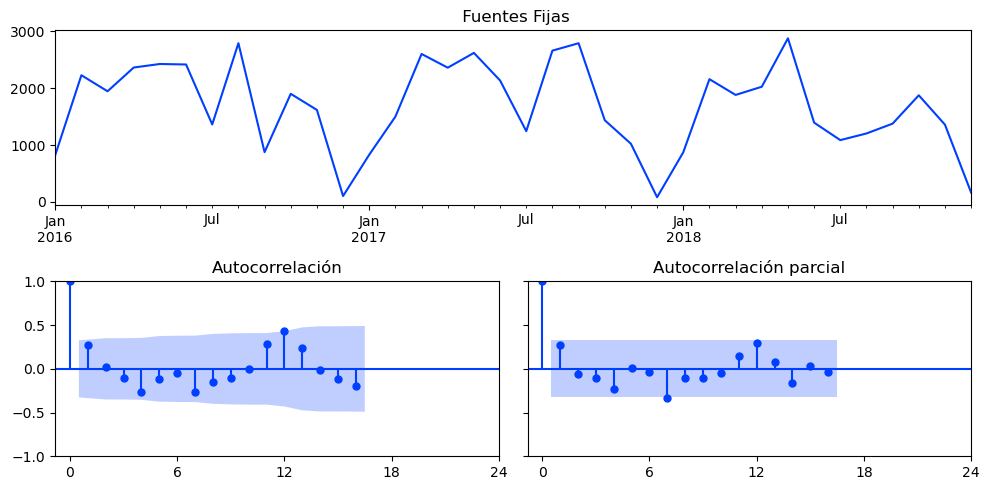

In [51]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

arimadataset.plot(ax=ax,title=' Fuentes Fijas', legend=None)
sm.graphics.tsa.plot_acf(arimadataset, ax=axs0, title='Autocorrelación')
sm.graphics.tsa.plot_pacf(arimadataset, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
plt.show()

In [52]:
def stationarityTest(series):
    adtestResult = adfuller(series.values)
    pValue = adtestResult[1]
    alpha = 0.05
    if pValue >= alpha:
        print(adtestResult)
        return "Esta serie no es estacionaria."
    else:
        print(adtestResult)
        return "Esta serie es estacionaria."

In [53]:
adf = adfuller(arimadataset, regression='ct', autolag='BIC')
print("_"*120)
print("Los valores críticos son",adf[4])
print("_"*120)
print("El p-value es", adf[1])

________________________________________________________________________________________________________________________
Los valores críticos son {'1%': -4.253042608385915, '5%': -3.5485904579686545, '10%': -3.2070617952371263}
________________________________________________________________________________________________________________________
El p-value es 0.048029314184695276


In [54]:
pmax = 4
qmax = 4
P = np.arange(pmax+1)
Q = np.arange(qmax+1)

In [55]:
aic = [[sm.tsa.arima.ARIMA(arimadataset , order=[p,0,q]).fit().aic for q in Q ] for p in P ]
AIC = pd.DataFrame(aic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
AIC

q=0         q=1         q=2         q=3         q=4
p=0  584.862043  583.581785  585.548863  587.439170  584.490994
p=1  583.652051  585.548195  585.106950  586.615409  585.816778
p=2  585.460990  583.432430  587.067246  586.598534  587.804702
p=3  586.955687  585.221907  587.126703  586.333916  588.455196
p=4  586.977378  588.981825  588.413668  586.982238  589.267029

Empleando el criterio de Akaike la combinación más pequeña es p = 2, q =1 

In [56]:
p = 2 
q = 1

In [57]:
modelo = sm.tsa.arima.ARIMA(arimadataset, order=(p, q, 36))
modelofit = modelo.fit()
print(modelofit.summary())
sss = modelofit.summary()

                                         SARIMAX Results                                          
Dep. Variable:     Litros totales       (l) Fuentes Fijas   No. Observations:                   36
Model:                                    ARIMA(2, 1, 36)   Log Likelihood                -273.899
Date:                                    Tue, 17 Oct 2023   AIC                            625.798
Time:                                            08:59:23   BIC                            686.457
Sample:                                        01-31-2016   HQIC                           646.738
                                             - 12-31-2018                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7802    591.133     -0.001      0

In [58]:
AutoArimaModel = auto_arima(arimadataset, seasonal=True, m=12)
AutoArimaModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   36
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                -284.647
Date:                  Tue, 17 Oct 2023   AIC                            575.294
Time:                          08:59:24   BIC                            580.044
Sample:                      01-31-2016   HQIC                           576.952
                           - 12-31-2018                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    667.0482    221.759      3.008      0.003     232.409    1101.687
ar.S.L12       0.5969      0.133      4.480      0.000       0.336       0.858
sigma2      3.729e+05   9.68e+04      3.853      0.000    1.83e+05    5.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.54   Prob(JB):                         0.81
Heteroskedasticity (H):               0.82   Skew:                             0.25
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Me indica que No. Observations:36 

In [59]:
residuos = pd.DataFrame()
residuos["Ut"] = modelofit.resid

Text(0.5, 1.0, 'Raíces inversas del polinomio autorregresivo')

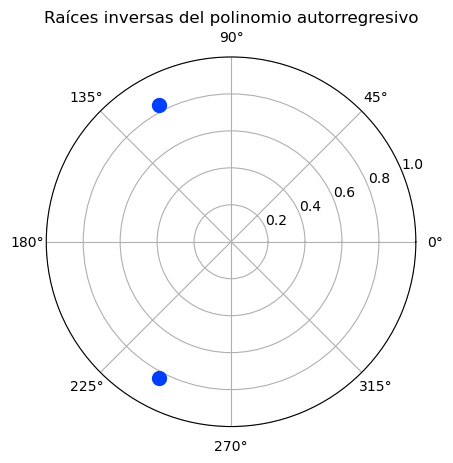

In [60]:
arroots = 1/modelofit.arroots

plt.polar(np.angle(arroots), np.abs(arroots), '.', ms=20)
fig = plt.gcf()
ax = fig.gca()
ax.set_rlim([0,1])
ax.set_title('Raíces inversas del polinomio autorregresivo')

In [61]:
stationarityTest(modelofit.resid)

(-4.071740700328339, 0.0010781027840523116, 1, 34, {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}, 377.4167722504073)


'Esta serie es estacionaria.'

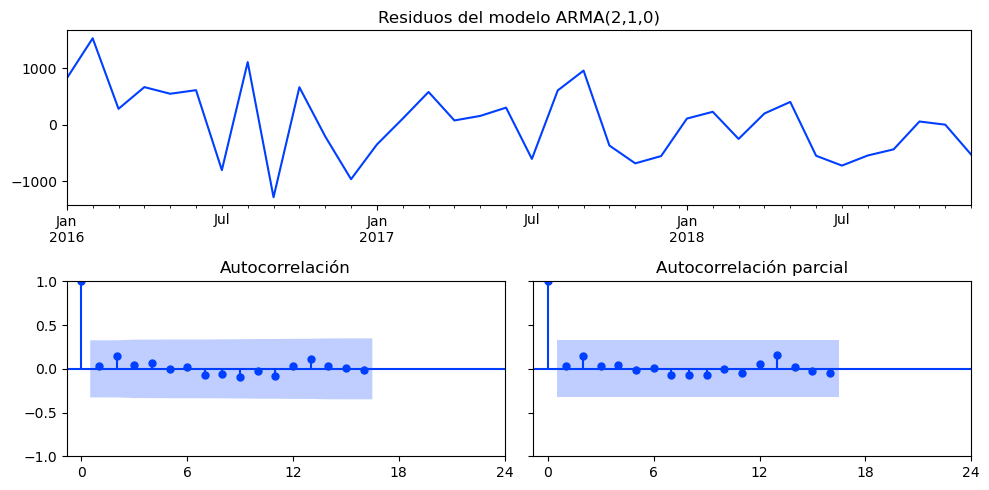

In [62]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

modelofit.resid.plot(ax=ax, title='Residuos del modelo ARMA(2,1,0)', legend=None)
sm.graphics.tsa.plot_acf(modelofit.resid, ax=axs0, title='Autocorrelación')
sm.graphics.tsa.plot_pacf(modelofit.resid, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
plt.show()

In [63]:
sm.stats.acorr_ljungbox(modelofit.resid, lags = [32], return_df = True)

lb_stat  lb_pvalue
32  21.60481    0.91756

<Axes: xlabel='Ut', ylabel='Count'>

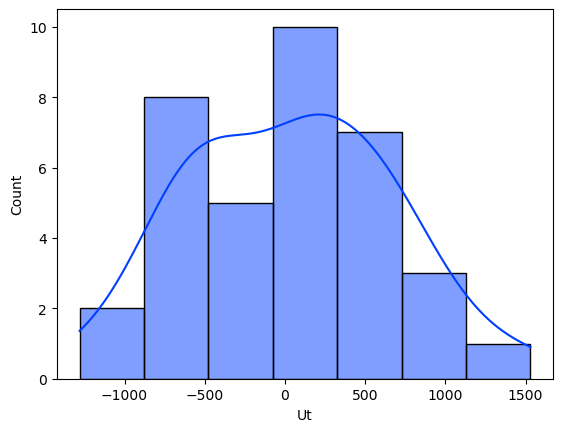

In [64]:
sns.histplot(data = residuos, x = "Ut", kde = True)

In [65]:
JB_pv = sm.stats.stattools.jarque_bera(modelofit.resid, axis=0)[1]
print("El p-value de prueba JB es ", JB_pv)

El p-value de prueba JB es  0.7831498956183276


In [66]:
Anderson_Empirico = sm.stats.diagnostic.anderson_statistic(modelofit.resid, dist='norm', fit=True, params=(), axis=0)
print("El p-value de la prueba de A-D es ", Anderson_Empirico)

El p-value de la prueba de A-D es  0.26630295788547187


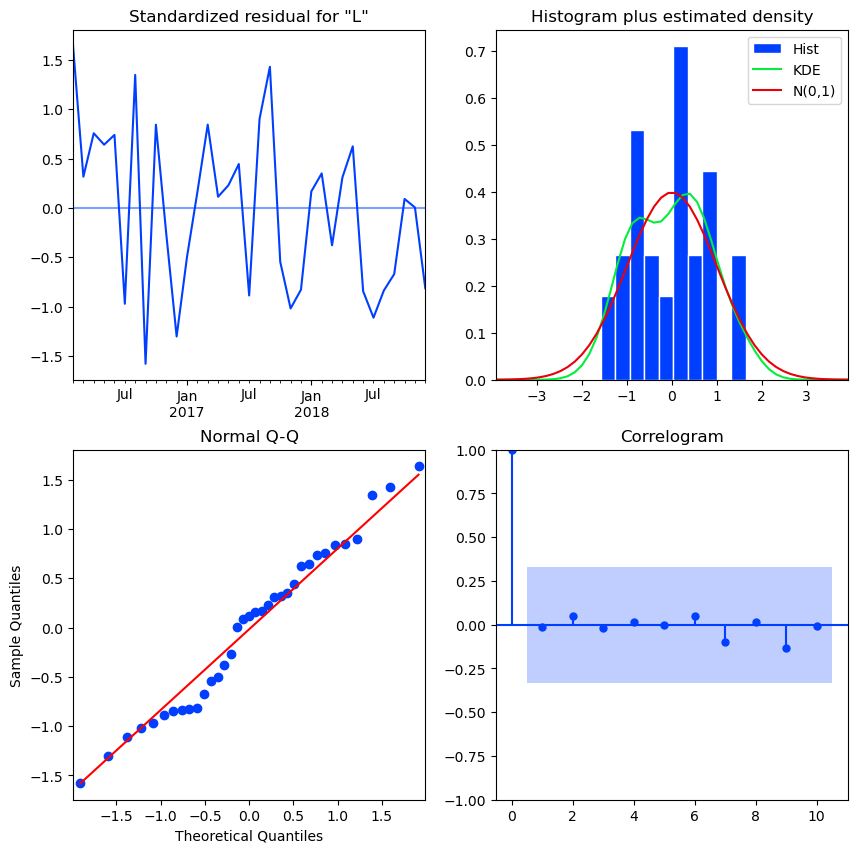

In [67]:
overallgraph = modelofit.plot_diagnostics(figsize=(10,10))

In [68]:
forecast_arima = modelofit.forecast(36)

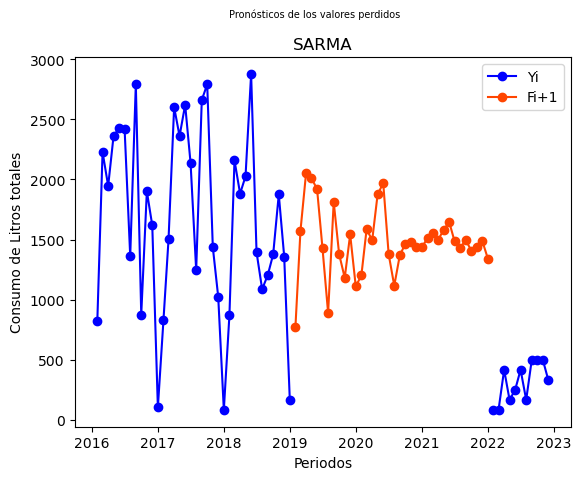

In [69]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('Pronósticos de los valores perdidos', fontsize =7)

ax1.plot(datos.index,
         datos['Litros totales       (l) Fuentes Fijas'],
         '-o',  color = 'blue', label = 'Yi')
ax1.plot(forecast_arima,'-o',  color = 'orangered', label = 'Fi+1' )
ax1.set(xlabel= 'Periodos', ylabel= 'Consumo de Litros totales')
ax1.set_title('SARMA')
ax1.legend(loc='best')

plt.show()

In [70]:
datos_reales_estimados_litros_totales_sarma =  pd.concat([datos['Litros totales       (l) Fuentes Fijas'].loc["2016-01-31":"2018-12-31"],
                                                  forecast_arima,
                                                    datos['Litros totales       (l) Fuentes Fijas'].loc["2022-01-01":"2022-12-31"]])

In [71]:
datos_reales_estimados_litros_totales_sarma = pd.DataFrame(datos_reales_estimados_litros_totales_sarma)
datos_reales_estimados_litros_totales_sarma.columns  = ["SARMA"]

In [72]:
fig = px.line(datos_reales_estimados_litros_totales_sarma, x= datos_reales_estimados_litros_totales_sarma.index,
              y= datos_reales_estimados_litros_totales_sarma["SARMA"] ,
              title='Método Estimación de Valores Perdidos SARMA')
fig.show()

### *Imputación Múltiple*

Un enfoque más sofisticado es utilizar la clase IterativeImputer, que modela cada característica con valores faltantes como una función de otras características, y utiliza esa estimación para la imputación. Lo hace de forma iterativa rotatoria: en cada paso, una columna de características se designa como salida y y las otras columnas de características se tratan como entradas X. Se ajusta un regresor en (X, y) para conocer y. A continuación, el regresor se utiliza para predecir los valores perdidos de y. Esto se hace para cada característica de forma iterativa, y luego se repite para las rondas de imputación max_iter. Se devuelven los resultados de la última ronda de imputación.

In [73]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
data_iterative_imp = pd.DataFrame()
data_iterative_imp["x_1"] = datos["Litros totales       (l) Fuentes Móviles"]
data_iterative_imp["x_2"] = datos[" Consumo Energía    (kWh)"]
data_iterative_imp["y"] = datos['Litros totales       (l) Fuentes Fijas']

In [74]:
imp_int = IterativeImputer()
y_hat = imp_int.fit_transform(data_iterative_imp)
y_hat = pd.DataFrame(y_hat)

In [75]:
index = pd.Index(sm.tsa.datetools.dates_from_range("2016M1", "2022M12"))    
y_hat.set_index(index, inplace=True)

In [76]:
y_hat

0         1            2
2016-01-31  10818.640000  520258.0   824.238039
2016-02-29  28693.320000  525991.0  2228.305207
2016-03-31  35695.960000  692349.0  1946.190195
2016-04-30  44776.620000  711904.0  2363.840913
2016-05-31  31995.100000  755482.0  2425.975960
...                  ...       ...          ...
2022-08-31  17292.932198  599443.6   500.476078
2022-09-30  28996.572752  714349.6   500.476078
2022-10-31  29131.706855  704331.0   500.476078
2022-11-30  29696.358471  734474.0   333.650719
2022-12-31  10519.859338  665531.0   251.677759

[84 rows x 3 columns]

In [77]:
forecast_iterative_imp = y_hat[2].loc["2019-01-31":"2021-12-31"]

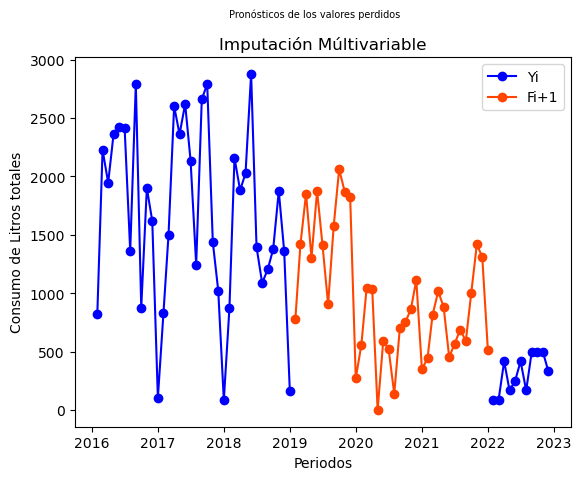

In [78]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('Pronósticos de los valores perdidos', fontsize =7)

ax1.plot(datos.index,
         datos['Litros totales       (l) Fuentes Fijas'],
         '-o',  color = 'blue', label = 'Yi')
ax1.plot(forecast_iterative_imp,'-o',  color = 'orangered', label = 'Fi+1' )
ax1.set(xlabel= 'Periodos', ylabel= 'Consumo de Litros totales')
ax1.set_title('Imputación Múltivariable')
ax1.legend(loc='best')

plt.show()

### *Imputación por KNN*

In [79]:
from sklearn.impute import KNNImputer
data_iterative_knn = pd.DataFrame()
data_iterative_knn["x_1"] = datos["Litros totales       (l) Fuentes Móviles"]
data_iterative_knn["x_2"] = datos[" Consumo Energía    (kWh)"]
data_iterative_knn["y"] = datos['Litros totales       (l) Fuentes Fijas']

In [80]:
imputerknn = KNNImputer(n_neighbors=2)
y_hat_knn =imputerknn.fit_transform(data_iterative_knn)
y_hat_knn = pd.DataFrame(y_hat_knn)
y_hat_knn

0         1            2
0   10818.640000  520258.0   824.238039
1   28693.320000  525991.0  2228.305207
2   35695.960000  692349.0  1946.190195
3   44776.620000  711904.0  2363.840913
4   31995.100000  755482.0  2425.975960
..           ...       ...          ...
79  17292.932198  599443.6   500.476078
80  28996.572752  714349.6   500.476078
81  29131.706855  704331.0   500.476078
82  29696.358471  734474.0   333.650719
83  10519.859338  665531.0   124.500000

[84 rows x 3 columns]

In [81]:
index = pd.Index(sm.tsa.datetools.dates_from_range("2016M1", "2022M12"))    
y_hat_knn.set_index(index, inplace=True)

In [82]:
forecast_knn = y_hat_knn[2].loc["2019-01-31":"2021-12-31"]
forecast_knn

2019-01-31     792.106340
2019-02-28     810.531699
2019-03-31    1221.531699
2019-04-30    1200.920457
2019-05-31    2323.500000
2019-06-30     500.476078
2019-07-31     135.545604
2019-08-31    2421.541361
2019-09-30    1782.158496
2019-10-31    1782.158496
2019-11-30    2323.500000
2019-12-31     135.545604
2020-01-31     453.825359
2020-02-29     806.343153
2020-03-31     688.241927
2020-04-30     458.769738
2020-05-31     478.206340
2020-06-30     453.825359
2020-07-31     827.619019
2020-08-31     478.206340
2020-09-30     810.531699
2020-10-31     478.206340
2020-11-30     457.206340
2020-12-31     827.619019
2021-01-31     478.206340
2021-02-28    1526.271623
2021-03-31     810.531699
2021-04-30     453.825359
2021-05-31     453.825359
2021-06-30     852.000000
2021-07-31     852.000000
2021-08-31     457.206340
2021-09-30     453.825359
2021-10-31    1155.858944
2021-11-30    1155.858944
2021-12-31     453.825359
Name: 2, dtype: float64

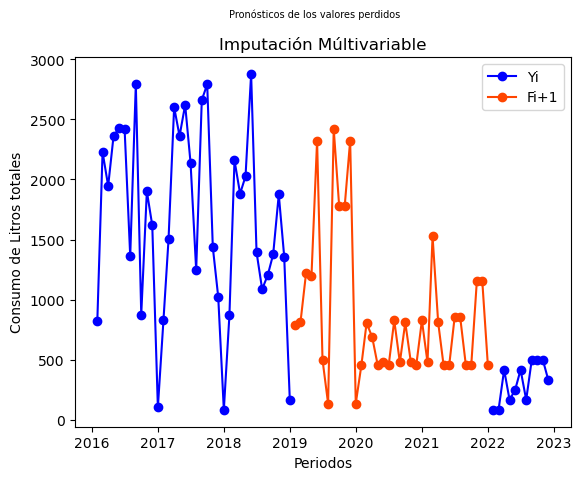

In [83]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('Pronósticos de los valores perdidos', fontsize =7)

ax1.plot(datos.index,
         datos['Litros totales       (l) Fuentes Fijas'],
         '-o',  color = 'blue', label = 'Yi')
ax1.plot(forecast_knn,'-o',  color = 'orangered', label = 'Fi+1' )
ax1.set(xlabel= 'Periodos', ylabel= 'Consumo de Litros totales')
ax1.set_title('Imputación Múltivariable')
ax1.legend(loc='best')

plt.show()

# Comparación entre las estimaciones de los datos perdidos empleando HoltWinters - SARMA - Imputación Múltiple - Imputación por KNN

### *Base de Datos*

In [84]:
datos_final_consumo_sin_nan = pd.DataFrame()

In [85]:
datos_final_consumo_sin_nan["SARMA"] = datos_reales_estimados_litros_totales_sarma["SARMA"]

In [86]:
datos_final_consumo_sin_nan["HoltWinters"] = datos_reales_estimados_litros_totales_holtwinters["H-W"]
datos_final_consumo_sin_nan["Originales"] = datos["Litros totales       (l) Fuentes Fijas"]
datos_final_consumo_sin_nan["ImputaciónMúltivariable"] = y_hat[2]
datos_final_consumo_sin_nan["Imputación KNN"] = y_hat_knn[2]

In [87]:
datos_final_consumo_sin_nan

SARMA  HoltWinters   Originales  ImputaciónMúltivariable  \
2016-01-31   824.238039   824.238039   824.238039               824.238039   
2016-02-29  2228.305207  2228.305207  2228.305207              2228.305207   
2016-03-31  1946.190195  1946.190195  1946.190195              1946.190195   
2016-04-30  2363.840913  2363.840913  2363.840913              2363.840913   
2016-05-31  2425.975960  2425.975960  2425.975960              2425.975960   
...                 ...          ...          ...                      ...   
2022-08-31   500.476078   500.476078   500.476078               500.476078   
2022-09-30   500.476078   500.476078   500.476078               500.476078   
2022-10-31   500.476078   500.476078   500.476078               500.476078   
2022-11-30   333.650719   333.650719   333.650719               333.650719   
2022-12-31          NaN          NaN          NaN               251.677759   

            Imputación KNN  
2016-01-31      824.238039  
2016-02-29     2228.305207  
2016-03-31     1946.190195  
2016-04-30     2363.840913  
2016-05-31     2425.975960  
...                    ...  
2022-08-31      500.476078  
2022-09-30      500.476078  
2022-10-31      500.476078  
2022-11-30      333.650719  
2022-12-31      124.500000  

[84 rows x 5 columns]

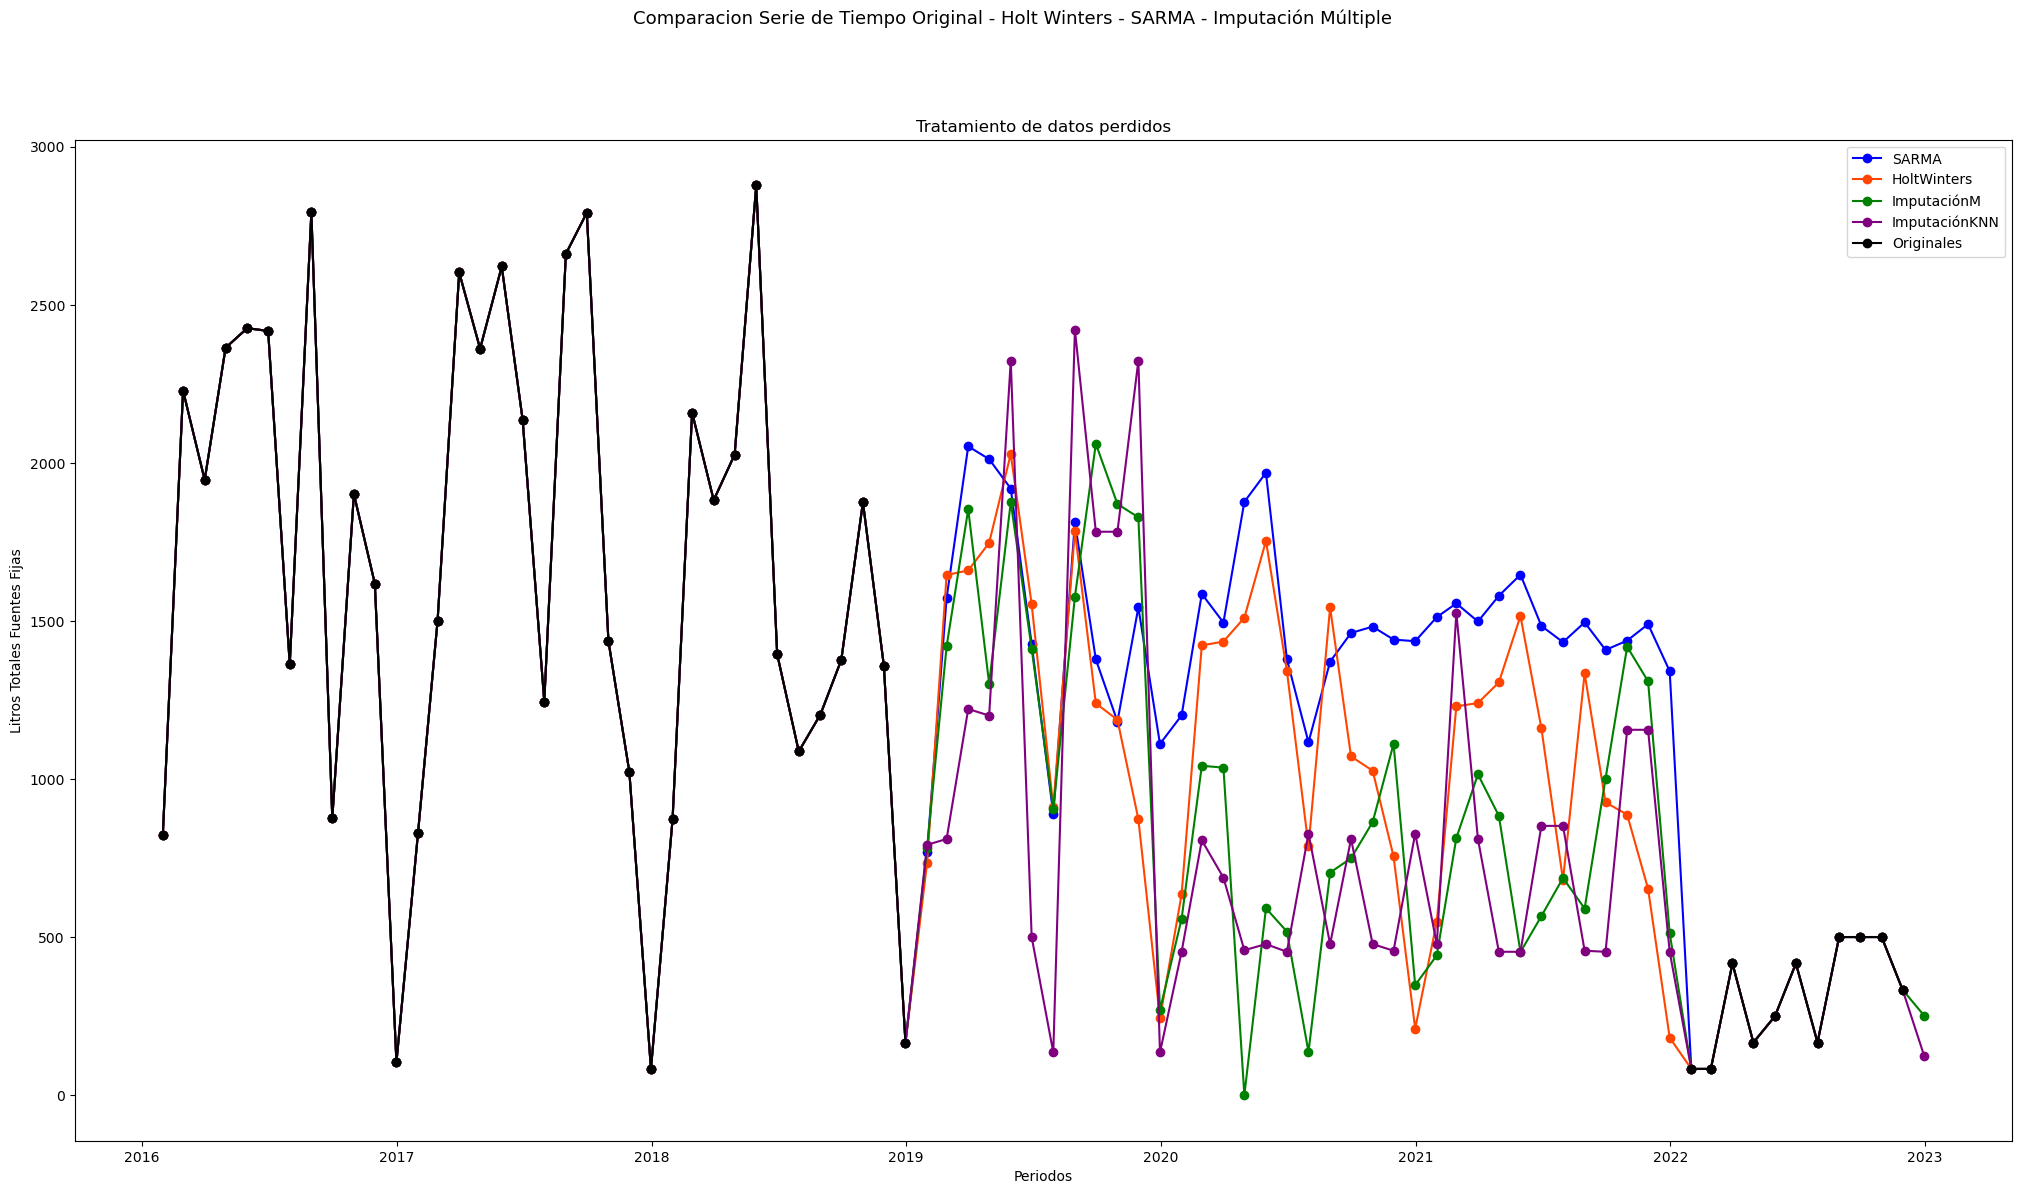

In [88]:
fig, (ax1) = plt.subplots(1,1, figsize = (25,13))
fig.suptitle('Comparacion Serie de Tiempo Original - Holt Winters - SARMA - Imputación Múltiple', fontsize =13)

# simple
ax1.plot(datos_final_consumo_sin_nan.index,
         datos_final_consumo_sin_nan['SARMA'], '-o',  color = 'blue', label = 'SARMA')
ax1.plot(datos_final_consumo_sin_nan.index,
         datos_final_consumo_sin_nan['HoltWinters'], '-o',  color = 'orangered', label = 'HoltWinters')
ax1.plot(datos_final_consumo_sin_nan.index,
         datos_final_consumo_sin_nan["ImputaciónMúltivariable"],'-o',  color = 'green', label = 'ImputaciónM' )
ax1.plot(datos_final_consumo_sin_nan.index,
         datos_final_consumo_sin_nan["Imputación KNN"],'-o',  color = 'purple', label = 'ImputaciónKNN' )
ax1.plot(datos_final_consumo_sin_nan.index,
         datos_final_consumo_sin_nan["Originales"],'-o',  color = 'black', label = 'Originales' )
ax1.set(xlabel= 'Periodos', ylabel= 'Litros Totales Fuentes Fijas')
ax1.set_title('Tratamiento de datos perdidos')
ax1.legend(loc='best')
plt.show()

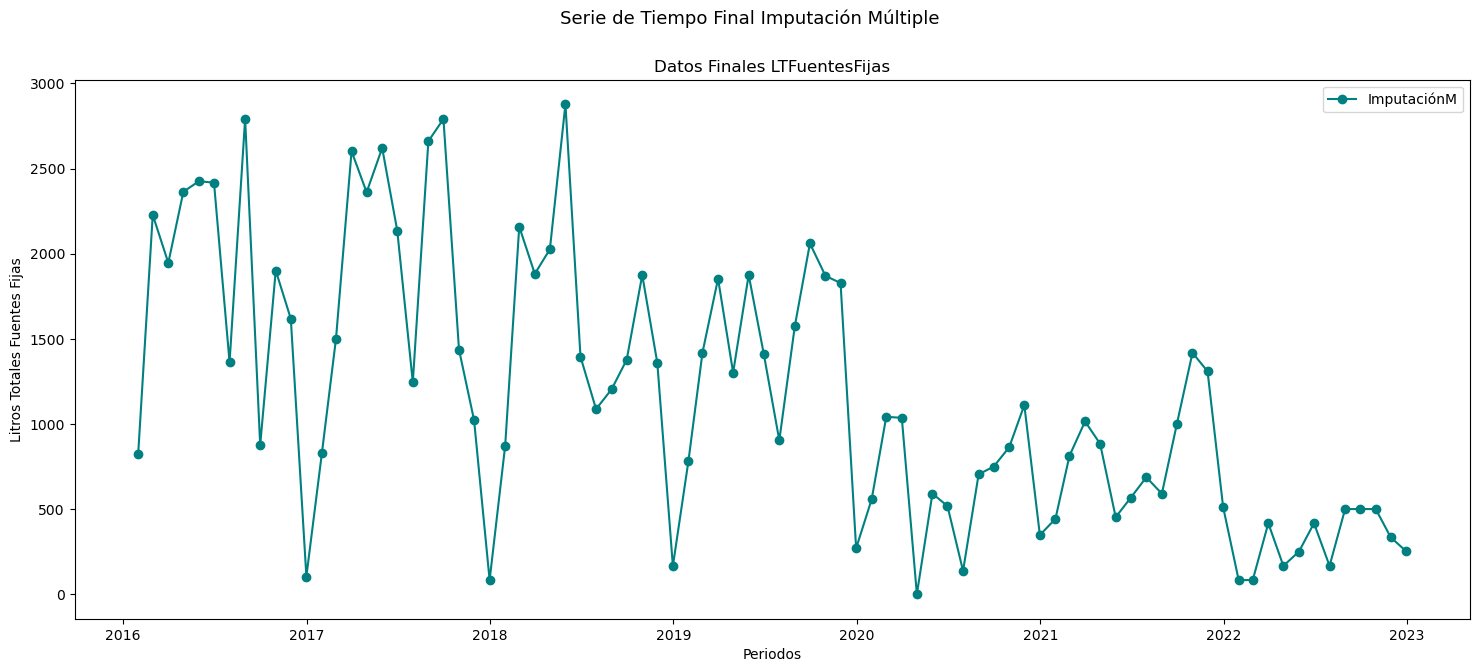

In [89]:
fig, (ax1) = plt.subplots(1,1, figsize = (18,7))
fig.suptitle('Serie de Tiempo Final Imputación Múltiple', fontsize =13)
# simple
ax1.plot(datos_final_consumo_sin_nan.index,
         datos_final_consumo_sin_nan["ImputaciónMúltivariable"],'-o',  color = 'teal', label = 'ImputaciónM' )
ax1.set(xlabel= 'Periodos', ylabel= 'Litros Totales Fuentes Fijas')
ax1.set_title('Datos Finales LTFuentesFijas')
ax1.legend(loc='best')
plt.show()

## Base de datos final 

In [90]:
base_datos_final_hh = pd.DataFrame()

In [91]:
base_datos_final_hh["ConsumoAguaM3"] = datos['Consumo agua(m3)']
base_datos_final_hh["ConsumoEnergíaKWh"] = datos[' Consumo Energía    (kWh)']
base_datos_final_hh["ConsumoPapelResmasMes"] = y_hat_papel[2]
base_datos_final_hh["ConsumoCombustibleFFijas"] = datos_final_consumo_sin_nan["ImputaciónMúltivariable"]
base_datos_final_hh["ConsumoCombustibleFMóviles"] = datos["Litros totales       (l) Fuentes Móviles"]

In [92]:
base_datos_final_hh.to_excel('base_datos_final_hh.xlsx')

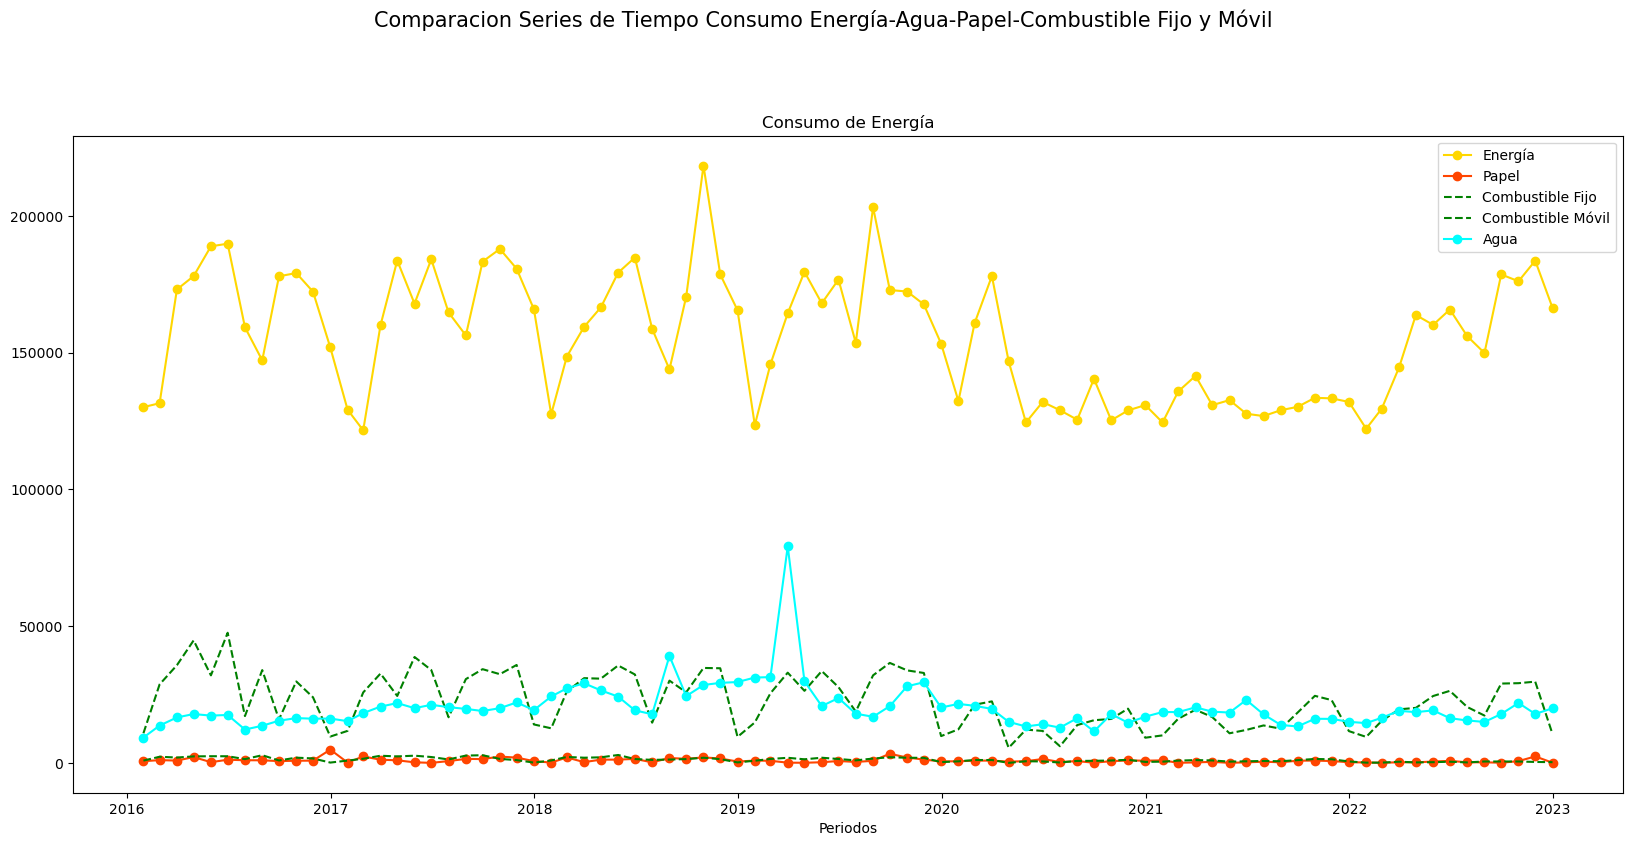

In [93]:
fig, (ax1) = plt.subplots(1,1, figsize = (20,9))
fig.suptitle('Comparacion Series de Tiempo Consumo Energía-Agua-Papel-Combustible Fijo y Móvil', fontsize =15)
# se dividio por 4 el consumo de energía meramente para propocitos de visualización
ax1.plot(base_datos_final_hh.index, (base_datos_final_hh['ConsumoEnergíaKWh'])/4, '-o',  color = 'gold', label = 'Energía')
ax1.plot(base_datos_final_hh.index, base_datos_final_hh['ConsumoPapelResmasMes'], '-o',  color = 'orangered', label = 'Papel')
ax1.plot(base_datos_final_hh.index, base_datos_final_hh['ConsumoCombustibleFFijas'], '--',  color = 'green', label = 'Combustible Fijo')
ax1.plot(base_datos_final_hh.index, base_datos_final_hh['ConsumoCombustibleFMóviles'], '--',  color = 'green', label = 'Combustible Móvil')
ax1.plot(base_datos_final_hh.index, base_datos_final_hh['ConsumoAguaM3'], '-o',  color = 'aqua', label = 'Agua')
ax1.set(xlabel= 'Periodos', ylabel= '')
ax1.set_title('Consumo de Energía')
ax1.legend(loc='best')
plt.subplots_adjust(top=0.84)

plt.show()